<img src="https://miro.medium.com/0*2WoBemE1kCEtGY2t" width="700" alt="AutoML">

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Step-1: Load and normalize the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
# Step-2: Flatten images (28x28 → 784)
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

In [4]:
# Step-3: Build a simple feedforward neural network
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Step-4: Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Step-5: Train the model
model.fit(x_train_flat, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=2)

Epoch 1/5


/Users/gourasundarmohanty/miniconda3/envs/py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1688/1688 - 3s - 2ms/step - accuracy: 0.9249 - loss: 0.2592 - val_accuracy: 0.9677 - val_loss: 0.1145
Epoch 2/5
1688/1688 - 2s - 1ms/step - accuracy: 0.9659 - loss: 0.1120 - val_accuracy: 0.9712 - val_loss: 0.0991
Epoch 3/5
1688/1688 - 3s - 2ms/step - accuracy: 0.9761 - loss: 0.0769 - val_accuracy: 0.9698 - val_loss: 0.0937
Epoch 4/5
1688/1688 - 2s - 1ms/step - accuracy: 0.9825 - loss: 0.0566 - val_accuracy: 0.9783 - val_loss: 0.0797
Epoch 5/5
1688/1688 - 2s - 1ms/step - accuracy: 0.9857 - loss: 0.0438 - val_accuracy: 0.9732 - val_loss: 0.0989


In [5]:
# Step-6: Evaluate the model
test_loss, test_acc = model.evaluate(x_test_flat, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.9703


In [6]:
# Step-7: Make predictions on test data
predictions = model.predict(x_test_flat)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step


In [7]:
# Step-8: Find correctly and incorrectly predicted samples
correct_indices = np.where(predicted_labels == y_test)[0]
incorrect_indices = np.where(predicted_labels != y_test)[0]
print(f"Total Correct: {len(correct_indices)}, Total Incorrect: {len(incorrect_indices)}")

Total Correct: 9703, Total Incorrect: 297


In [8]:
# Step-9: Function to plot predictions
def plot_predictions(indices, title):
    plt.figure(figsize=(12, 6))
    plt.suptitle(title, fontsize=14, fontweight='bold')
    for i, idx in enumerate(indices[:10]):  # show 10 examples
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_test[idx], cmap='gray')
        pred = predicted_labels[idx]
        true = y_test[idx]
        color = 'green' if pred == true else 'red'
        plt.title(f"Pred: {pred}\nTrue: {true}", color=color)
        plt.axis('off')
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()

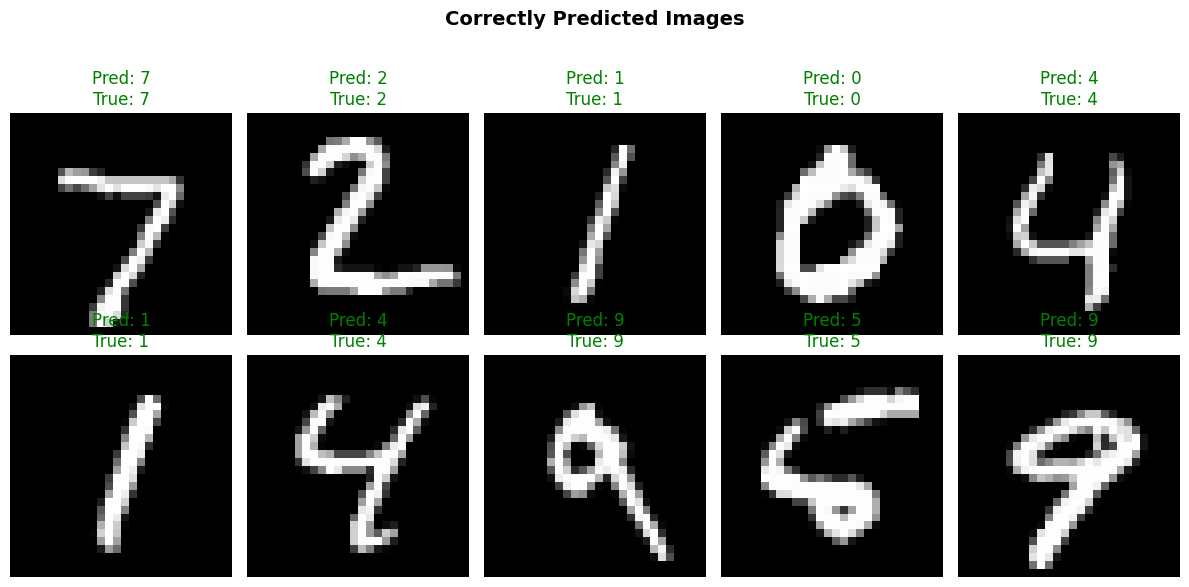

In [9]:
# Step-10: Show correctly predicted images
plot_predictions(correct_indices, "Correctly Predicted Images")

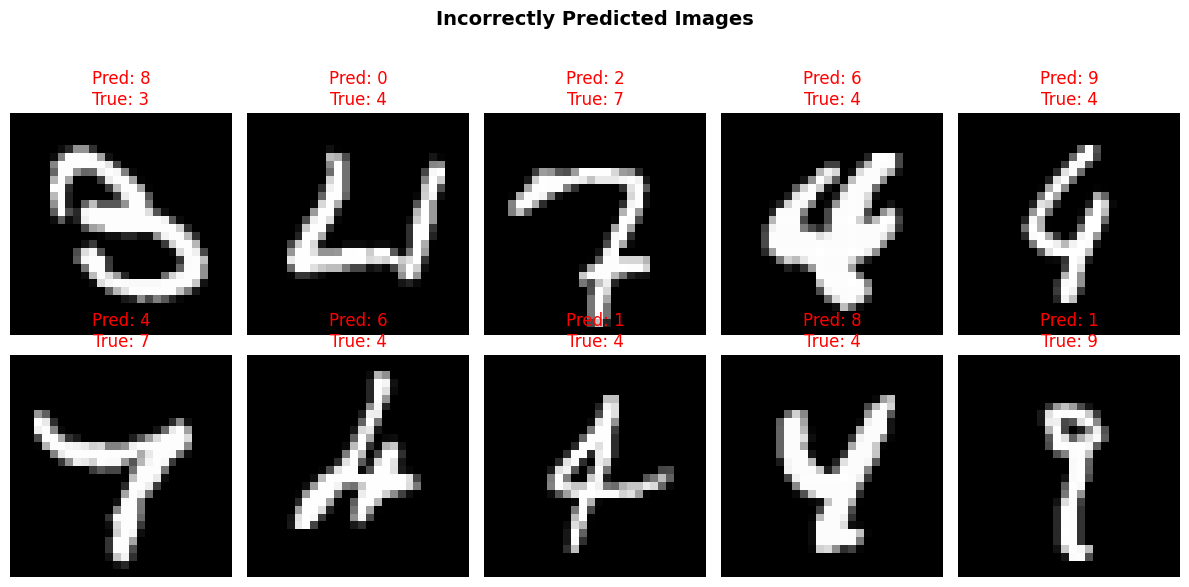

In [10]:
# Step-11: Show incorrectly predicted images
plot_predictions(incorrect_indices, "Incorrectly Predicted Images")